In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
# https://s3-eu-west-1.amazonaws.com/blog-ecotree/blog/0001/01/ad46dbb447cd0e9a6aeecd64cc2bd332b0cbcb79.jpeg
# https://www.researchgate.net/publication/351527953/figure/fig1/AS:1022717201498114@1620846190680/Cameramantif-Table-2-Results-Obtained-using-Baseline.ppm
img = cv.imread("/content/test1.jpg")
grayscale_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

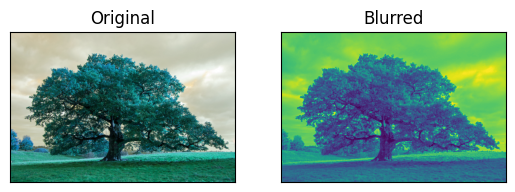

In [ ]:
# blur = cv.blur(img, (5, 5))
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(grayscale_image), plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.show()

true colour image


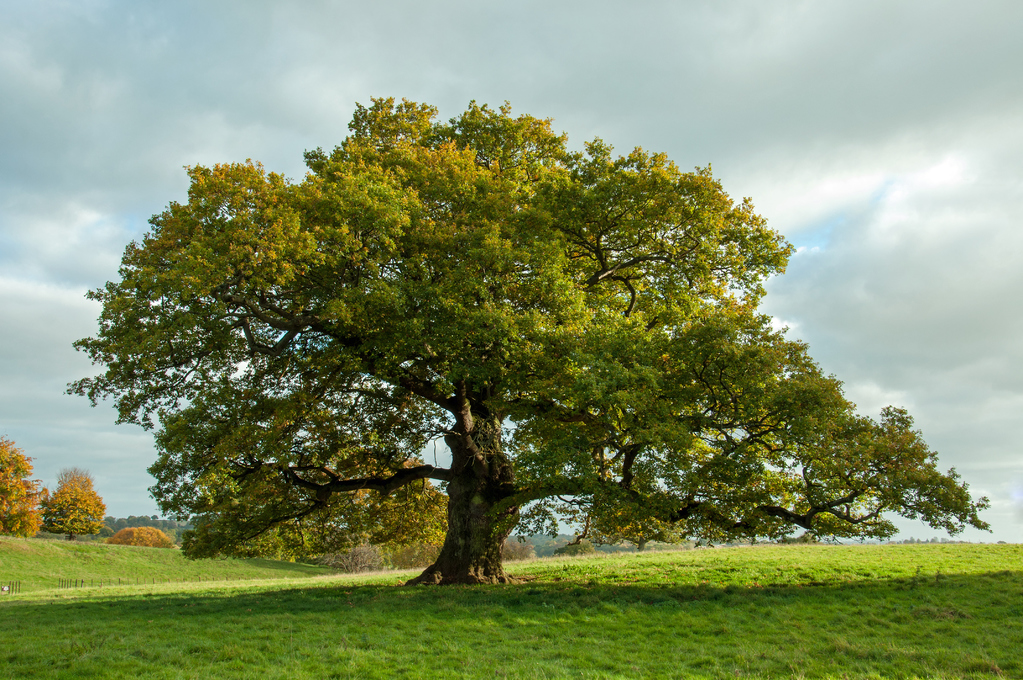

binary image


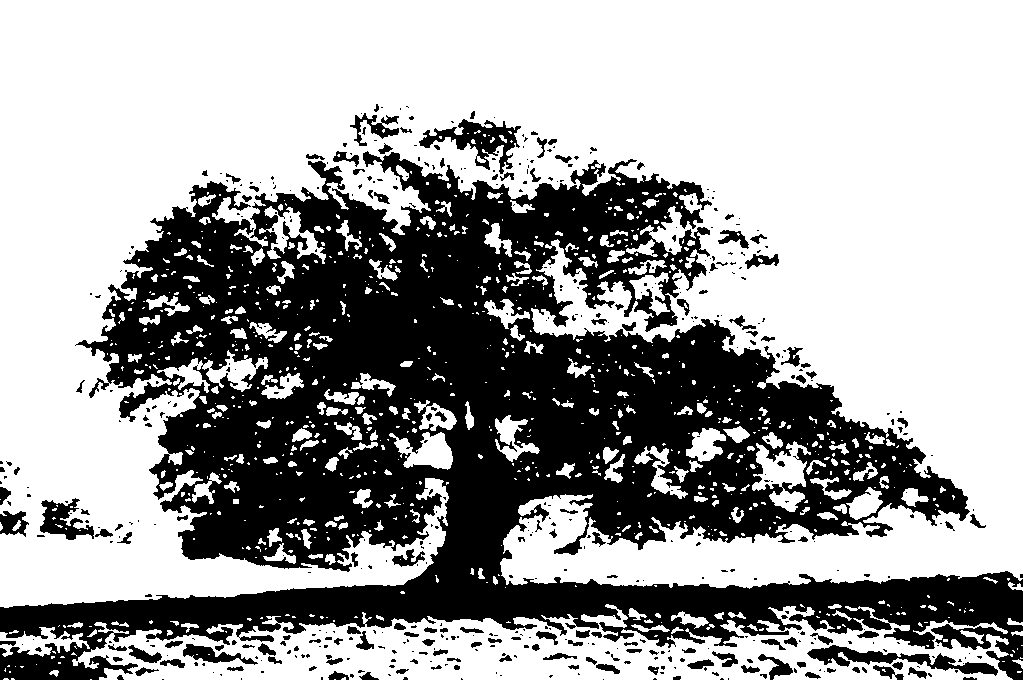

greyscale


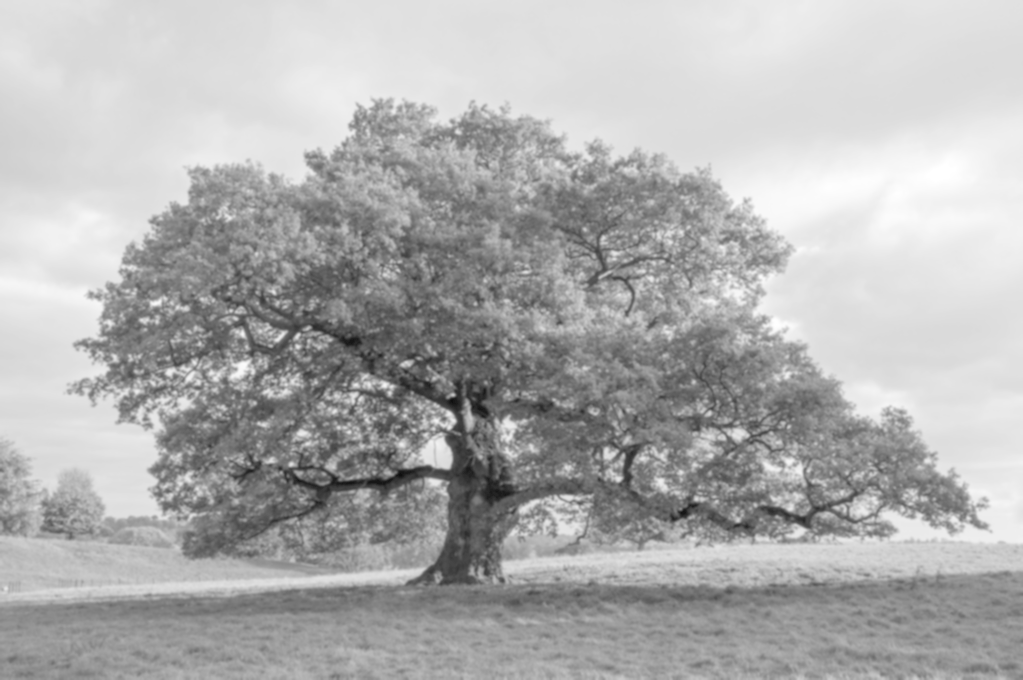

indexed color


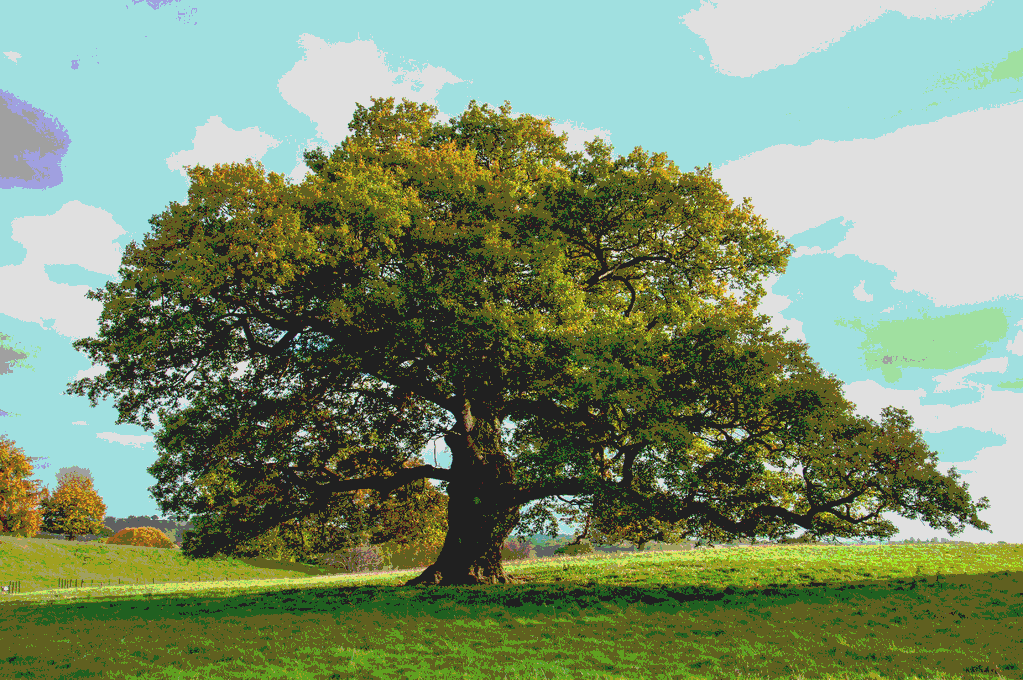

In [ ]:
def process_image(image_path):
    image1 = cv2.imread(image_path)
    image2 = cv2.GaussianBlur(image1, (5, 5), 0)
    image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    _, image4 = cv2.threshold(image3, 91, 300, cv2.THRESH_BINARY)
    image5 = np.array(255 * (image3 / 255) ** 0.5)
    image6 = image1 // 64 * 64 + 64 // 2

    print("true colour image")
    cv2_imshow(image1)
    print("binary image")
    cv2_imshow(image4)
    print("greyscale")
    cv2_imshow(image5)
    print("indexed color")
    cv2_imshow(image6)

    # get greyscale image sizes
    cv2.imwrite("gs1.jpeg", image5) # 148.92 kb
    cv2.imwrite("gs1.png", image5) # 297.25 kb
    cv2.imwrite("gs1.bmp", image5) # 681.05 kb

    # get binary image sizes
    cv2.imwrite("bi.jpeg", image4) # 263.23 kb
    cv2.imwrite("bi.png", image4) # 297.25 kb
    cv2.imwrite("bi.bmp", image4) # 30.81 kb

    # get indexed colour image sizes
    cv2.imwrite("ic.jpeg", image6) # 392.68 kb
    cv2.imwrite("ic.png", image6) # 207.45 kb
    cv2.imwrite("ic.bmp", image6) # 1.99 mb

    # get true colour image sizes
    cv2.imwrite("tc.jpeg", image1) # 450 b
    cv2.imwrite("tc.png", image1) # 167 b
    cv2.imwrite("tc.bmp", image1) # 1.16 kb

image_path = "/content/test1.jpg"
process_image(image_path)

ind2gray


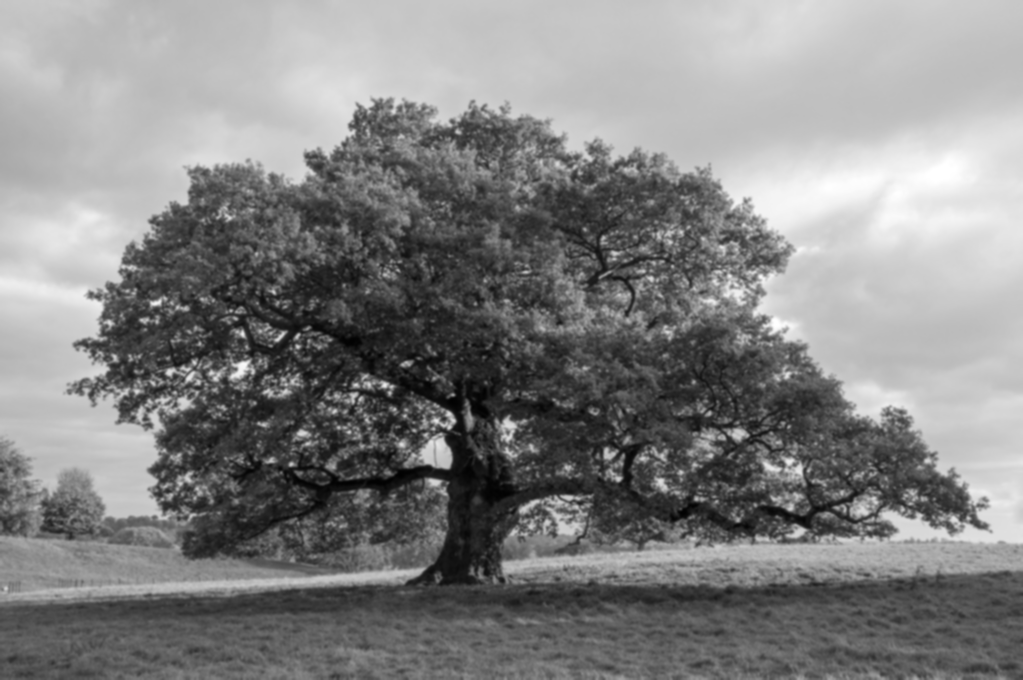

In [ ]:
def ind2gray(image_path):
    image1 = cv2.imread(image_path)
    image2 = cv2.cvtColor(cv2.GaussianBlur(image1, (5, 5), 0), cv2.COLOR_BGR2GRAY)
    print("ind2gray")
    cv2_imshow(image2)

image_path = "/content/test1.jpg"
ind2gray(image_path)

In [ ]:
def im2uint8(image):
    original = Image.open(image)
    uint8 = np.asarray(original)
    print(uint8)

im2uint8('/content/gs1.jpeg')

[[225 224 224 ... 225 225 225]
 [225 224 224 ... 225 225 225]
 [225 224 224 ... 225 225 225]
 ...
 [147 147 147 ... 132 130 129]
 [149 150 151 ... 135 134 134]
 [150 151 152 ... 137 138 139]]


In [ ]:
im2uint8('cameraman.tif')

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


In [ ]:
"""
Part A
1.
a. determine its type (binary greyscale, true colour or indexed colour)
- indexed colour
b. determine its size (in pixels)
- 1023x680 pixels
c. give a brief decription of the picture (what it looks like; what it seems to be a picture of)
- it seems to be a high resolution picture of a tree, that is mostly green

2. Pick a greyscale image, say cameraman.tif or wombats.tif. Using the imwrite function, write it to files of type JPEG, PNG and BMP.
What are the sizes of the files?
- 148.92 kb
- 297.25 kb
- 681.05 kb
3. Repeat the above question with
a. a binary image
- 263.23 kb
- 297.25 kb
 - 30.81 kb
b. an indexed colour image
- 392.68 kb
- 207.45 kb
- 1.99 mb
c. a true colour image
- 450 b
- 167 b
- 1.16 kb

Part B
1. Open the greyscale image cameraman.tif and view it. What data type is it?
- .tif
2. Enter the following commands
>> em,map]=imread('emu.tif');
>> e=ind2gray(em,map);
This will produce a greyscale image of type double. View this image.
3. Enter the command
>> e2=im2uint8(e);
and view the output
What does the function im2uint8 do? What affect does it have on
a. the appearance of the image?
it rescales the image if necessary
b. the elements of the image matrix?
all the numbers in the matrix are converted into uint8
4. What happens if you apply im2uint8 to the cameraman image?
- it remains the same
5.
"""